#**Predict Clicked Ads Customer Classification by using Machine Learning**

## Background

Sebuah perusahaan di Indonesia ingin mengetahui efektifitas sebuah iklan yang mereka tayangkan, hal ini penting bagi perusahaan agar dapat mengetahui seberapa besar ketercapainnya iklan yang dipasarkan sehingga dapat menarik customers untuk melihat iklan.

Akan dilakukan pemodelan machine learning, untuk memprediksi potential user dalam digital advertising. Dengan mengasumsikan diri kita sebagai Data Scientist pada sebuah perusahaan yang bergerak di bidang consultant digital marketing.

## Problem

Tim bisnis ingin mengoptimalkan metode cara beriklan mereka di platform digital agar mendapatkan user yang potential untuk click sebuah product. Agar cost yang akan dikeluarkan tidak terlalu besar.

## Goals

Membuat machine learning model yang dapat mendeteksi potential user untuk convert atau tertarik pada sebuah iklan. Sehingga kita bisa mengoptimalkan cost dalam beriklan di platform digital.

# Data

Data yang akan kita gunakan bernama `Clicked Ads Dataset.csv`. Data tersebut memiliki 9 feature dengan 1 target berikut adalah informasi variable yang digunakan

Variable Information:
- Daily Time Spent on Site: Lamanya tinggal disuatu situs (harian) dalam satuan menit
- Age: Umur user dalam satuan tahun
- Area Income: Pendapatan user dalam satuan rupiah
- Daily Internet Usage: Penggunaan internet harian dalam satuan menit
- Male: Gender user
- Timestamp: Kapan user visit sebuah situs
- Clicked on Ad: Click atau tidak iklan yang ditampilkan
- city: Kota asal user
- province: Provinsi asal user
- category: Kategori product yang dikunjungi

In [ ]:
# Install library ppscore to calculate correlation between variable
!pip install -U ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13165 sha256=8aefb2c3247c47d4a9ad041a414427df3c912e9030b5b10f5419b0bc94d24220
  Stored in directory: /root/.cache/pip/wheels/d8/2d/fc/c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import ppscore as pps

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from warnings import filterwarnings
filterwarnings('ignore')

## Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Clicked Ads Dataset.csv to Clicked Ads Dataset.csv


In [ ]:
df = pd.read_csv("Clicked Ads Dataset.csv")
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# Exploratory Data Analysis

## Descriptive Statistic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
#drop column Unnamed: 0
df = df.drop('Unnamed: 0', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


### Cek Duplikat dan Null

In [ ]:
# Cek data duplikat
df[df.duplicated(keep=False) == True]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category


Tidak menemukan data duplikat

In [ ]:
# Cek data null
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [ ]:
print((df.isna().sum()/df.shape[0]*100)['Daily Time Spent on Site'])
print((df.isna().sum()/df.shape[0]*100)['Area Income'])
print((df.isna().sum()/df.shape[0]*100)['Daily Internet Usage'])
print((df.isna().sum()/df.shape[0]*100)['Male'])

1.3
1.3
1.0999999999999999
0.3


In [ ]:
#Numerical
num_dtypes = ['int64', 'float64']
num_df = df.select_dtypes(include=num_dtypes)
nums = num_df.columns
print(nums)

#Categorical
cat_df = df.select_dtypes(include='object')
cats = cat_df.columns
print(cats)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')
Index(['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')


### Numerik 

In [ ]:
df[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


### Categorical

In [ ]:
df['Timestamp'].describe()

count                1000
unique                997
top       5/26/2016 15:40
freq                    2
Name: Timestamp, dtype: object

In [ ]:
df[cats].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [ ]:
for column in cats:
    print(df[column].value_counts())
    print("-" * 40)

Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64
----------------------------------------
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64
----------------------------------------
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
----------------------------------------
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbar

**Kesimpulan:**

* Terdapat datatype yang tidak sesuai yaitu pada kolom Timestamp (datatype=object)  
* Tidak terdapat data duplikat
*   Missing value terdapat pada kolom Daily Time Spent on Site (1,3%), Area Income (1,3%), Daily Internet Usage (1,09), dan Male (0,3%)
*   Data-data pada data numerical maupun data categorical tidak ada yang aneh (terbilang normal)







## Univariate Analysis

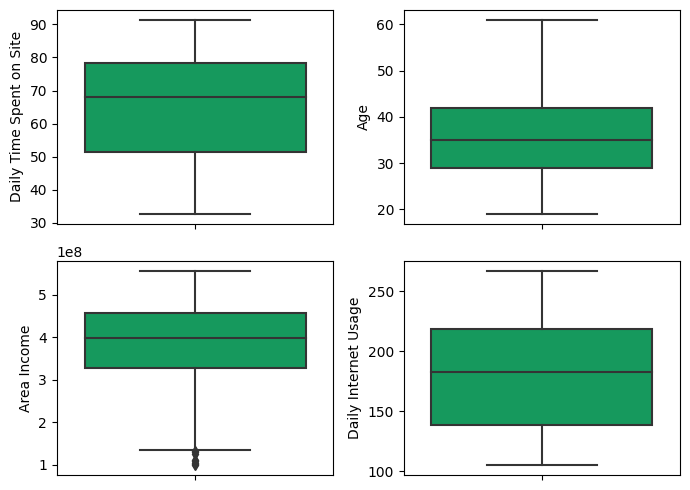

In [ ]:
# Individual Boxplot
plt.figure(figsize=(7, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[nums[i]], color='#00af5f', orient='v')
    plt.tight_layout()

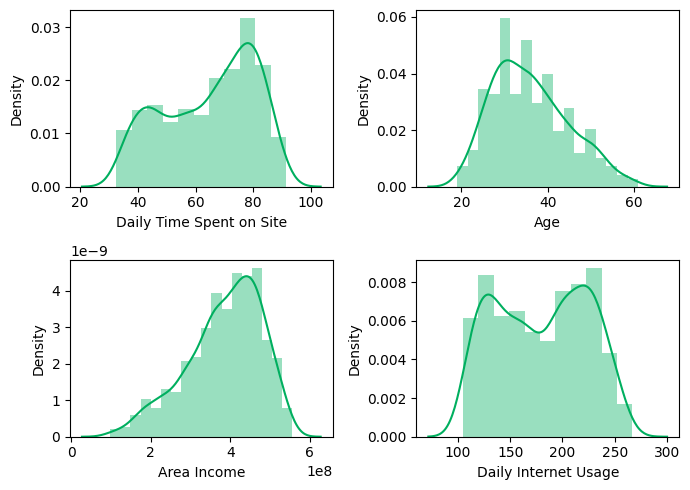

In [ ]:
# Individual Distplot
plt.figure(figsize=(7, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1) 
    sns.distplot(df[nums[i]], color='#00af5f')
    plt.tight_layout()

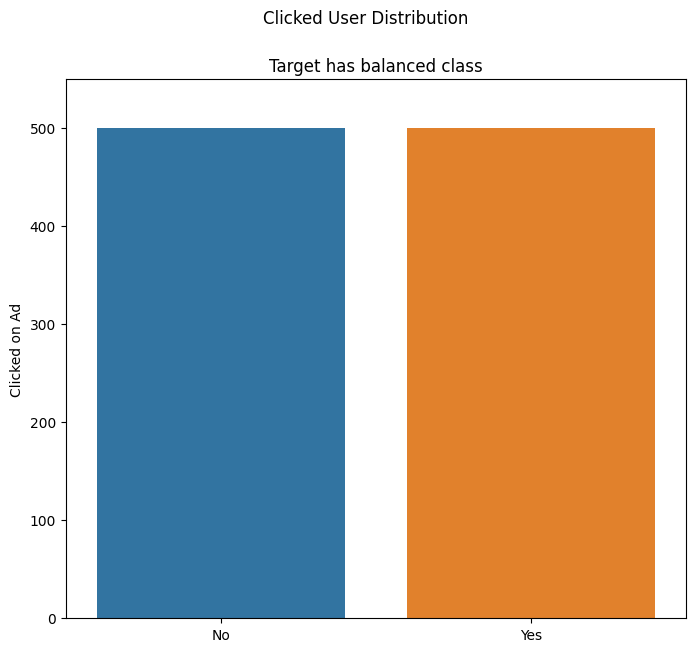

In [ ]:
# target countplot distribution (Clicked on Ad)
counts = df['Clicked on Ad'].value_counts()

plt.figure(figsize=(8,7))
sns.barplot(x=counts.index,y=counts)

plt.suptitle('Clicked User Distribution')
plt.title('Target has balanced class')
plt.ylim(0,550)
plt.show()

Data target yang akan kita gunakan ternyata memiliki label yang balanced (seimbang) sehingga kita tidak perlu melakukan preprocessing untuk mengatasi imbalanced class.

## Bivariate Analysis

In [ ]:
yes = df[df['Clicked on Ad'] == 'Yes']
no = df[df['Clicked on Ad'] == 'No']

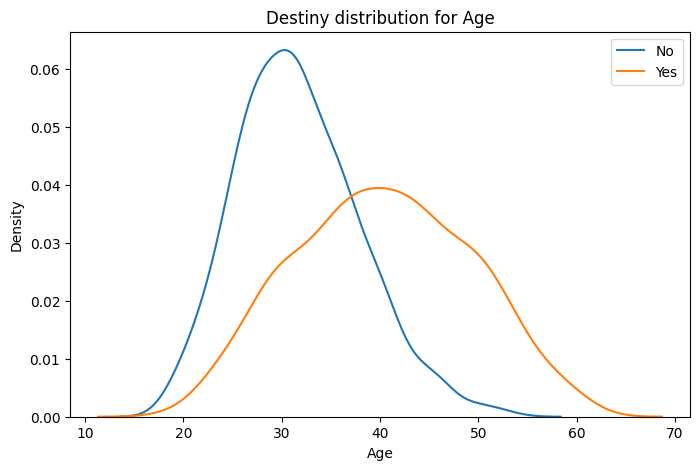

In [ ]:
# Age Distribution
plt.figure(figsize=(8,5))

sns.kdeplot(no['Age'], label='No')
sns.kdeplot(yes['Age'], label='Yes')

plt.title('Destiny distribution for Age')
plt.legend()
plt.show()

User yang berpotensi merespon iklan perusahaaan terdapat pada orang tua. Mungkin karena anak muda jauh lebih teliti dan selektif ketika browsing internet. Serta anak muda sangat mudah menyadari ketika ada iklan di sebuah website.


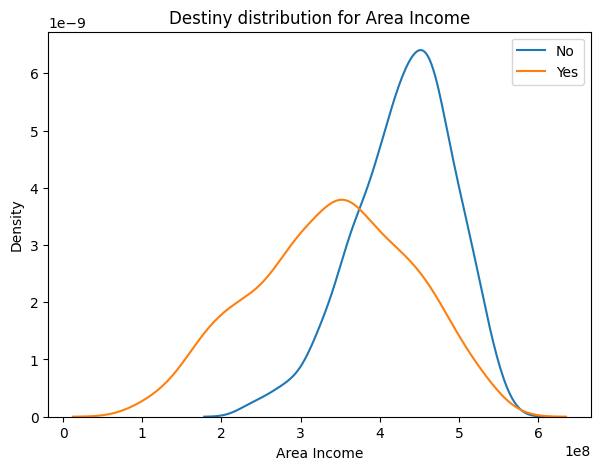

In [ ]:
# Area Income Distribution
plt.figure(figsize=(7,5))
sns.kdeplot(no['Area Income'], label='No')
sns.kdeplot(yes['Area Income'], label='Yes')

plt.title('Destiny distribution for Area Income')
plt.legend()
plt.show()

Potensi user yang merespon ditemukan pada user yang berpendapatan lebih rendah dibandingkan yang tidak merespon.

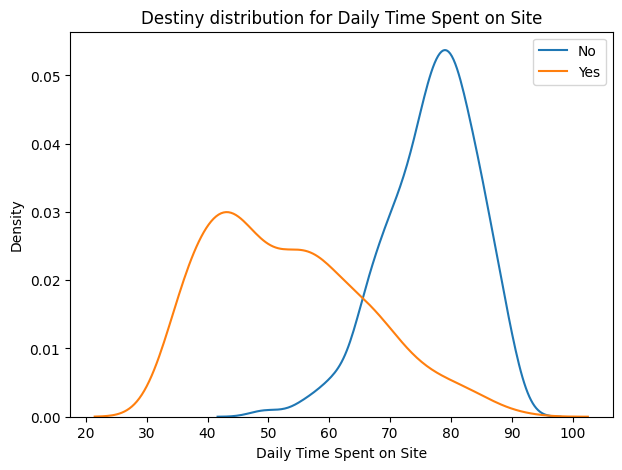

In [ ]:
# Daily Time Spent on Site Distribution
plt.figure(figsize=(7,5))
sns.kdeplot(no['Daily Time Spent on Site'], label='No')
sns.kdeplot(yes['Daily Time Spent on Site'], label='Yes')

plt.title('Destiny distribution for Daily Time Spent on Site')
plt.legend()
plt.show()

Potensi user yang merespon ditemukan ketika berkunjung ke sebuah website yang hanya sebentar dibandingkan yang tidak merespon.

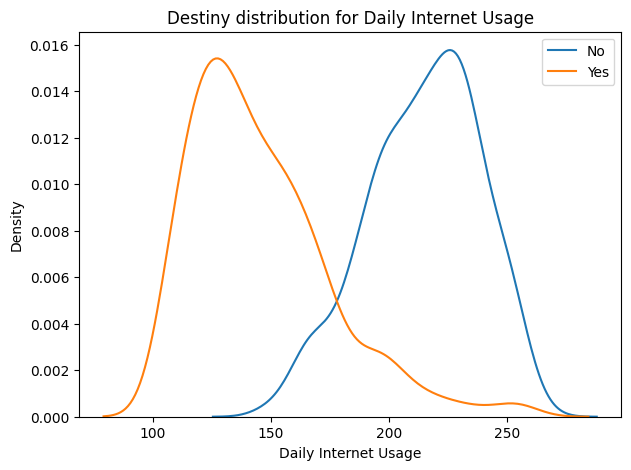

In [ ]:
# Daily Internet Usage Distribution
plt.figure(figsize=(7,5))
sns.kdeplot(no['Daily Internet Usage'], label='No')
sns.kdeplot(yes['Daily Internet Usage'], label='Yes')

plt.title('Destiny distribution for Daily Internet Usage')
plt.legend()
plt.show()

Dapat dilihat distribusi penggunaan internet harian (dalam satuan menit). Menunjukkan bahawa potensi user yang merespon lebih tinggi untuk user yang jarang menggunakan internet dibandiangan dengan user yang sering menggunakan internet.

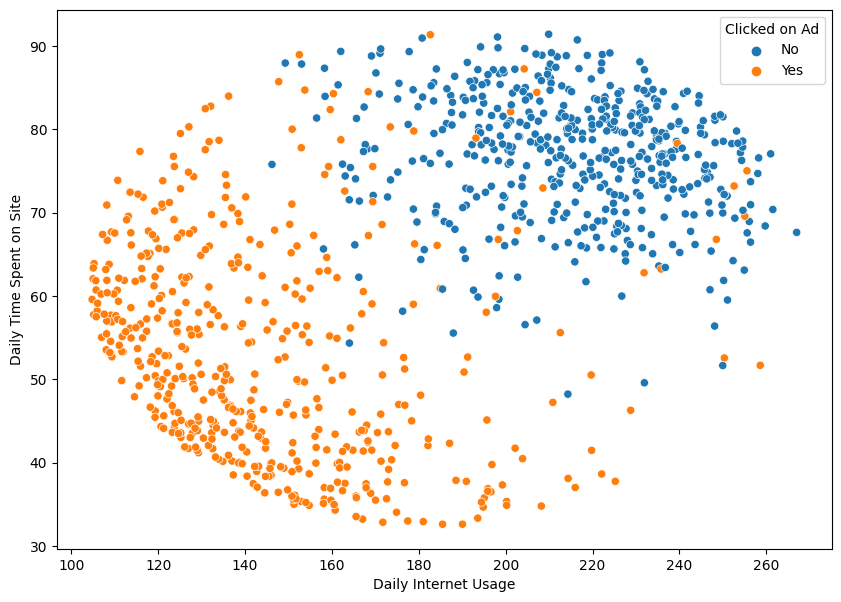

In [ ]:
# Internet Usage vs Time Spent on Site

plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Daily Internet Usage'], y=df['Daily Time Spent on Site'], hue=df['Clicked on Ad'])

plt.show()

Diketahui bahwa terdapat kemiripan antara penggunaan internet dan lamanya berkunjung pada sebuah website. 
Dengan melihat hubungan 2 buah feature tersebut dengan targetnya, didapat: 
- Ternyata berdasarkan plot tersebut kita bisa tahu bahwa penggunaan internet dan lamanya visit sebuah site dapat terbagi menjadi 2 buah segment yaitu active user dan non active user.
- 2 Segment tersebut dapat menjadi feature yang cukup erat dengan potensi seseorang click sebuah iklan atau tidak. 
- Active user cenderung tidak suka mengclick sebuah iklan dibandingkan non Active User.

Kesimpulannya, kita bisa mengoptimalkan sistem advertisment kita kepada user-user yang tidak aktif menggunakan internet.

## Multivariate Analysis

<Axes: >

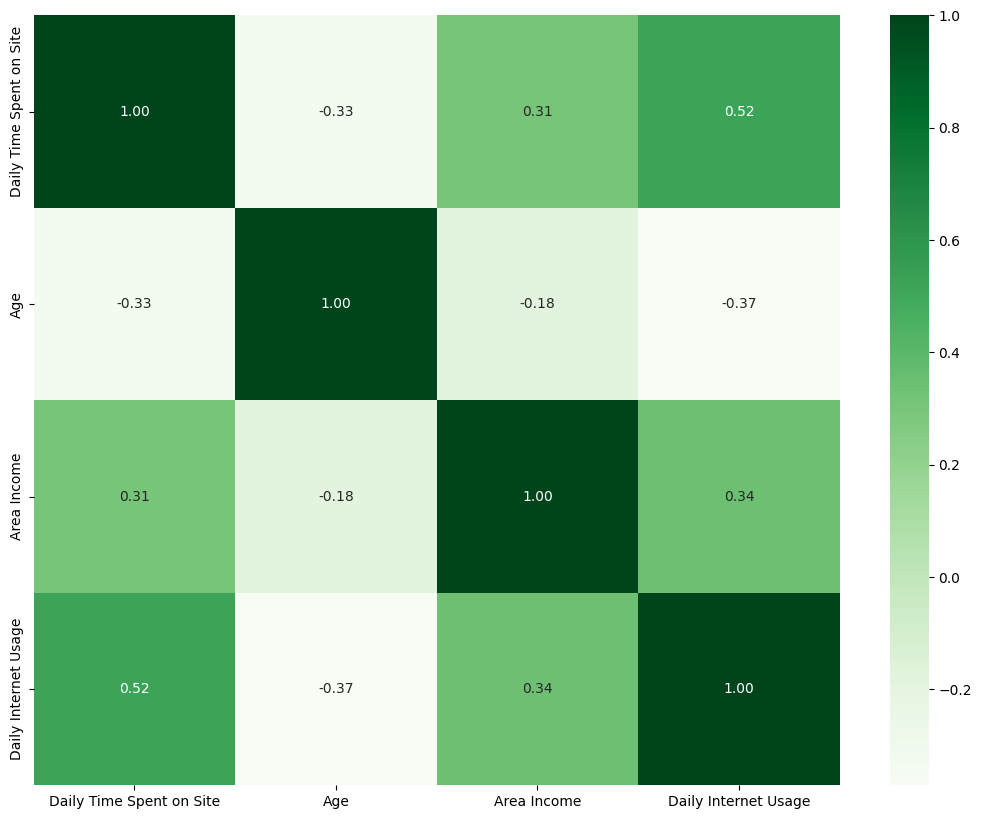

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

Dari korelasi di atas kita tidak menemukan adanya multicorrelation (korelasi antar variable) sehingga kita dapat menggunakan semua feature untuk dilakukan modeling. Namun dengan menggunakan korelasi pearson kita tidak dapat mengetahui hubungan antara feature dengan target. oleh karena itu, kita akan menggunakan **PPS (Predictive Power Score)** untuk mengetahui hubungan antar feature dengan target.

<Axes: xlabel='x', ylabel='y'>

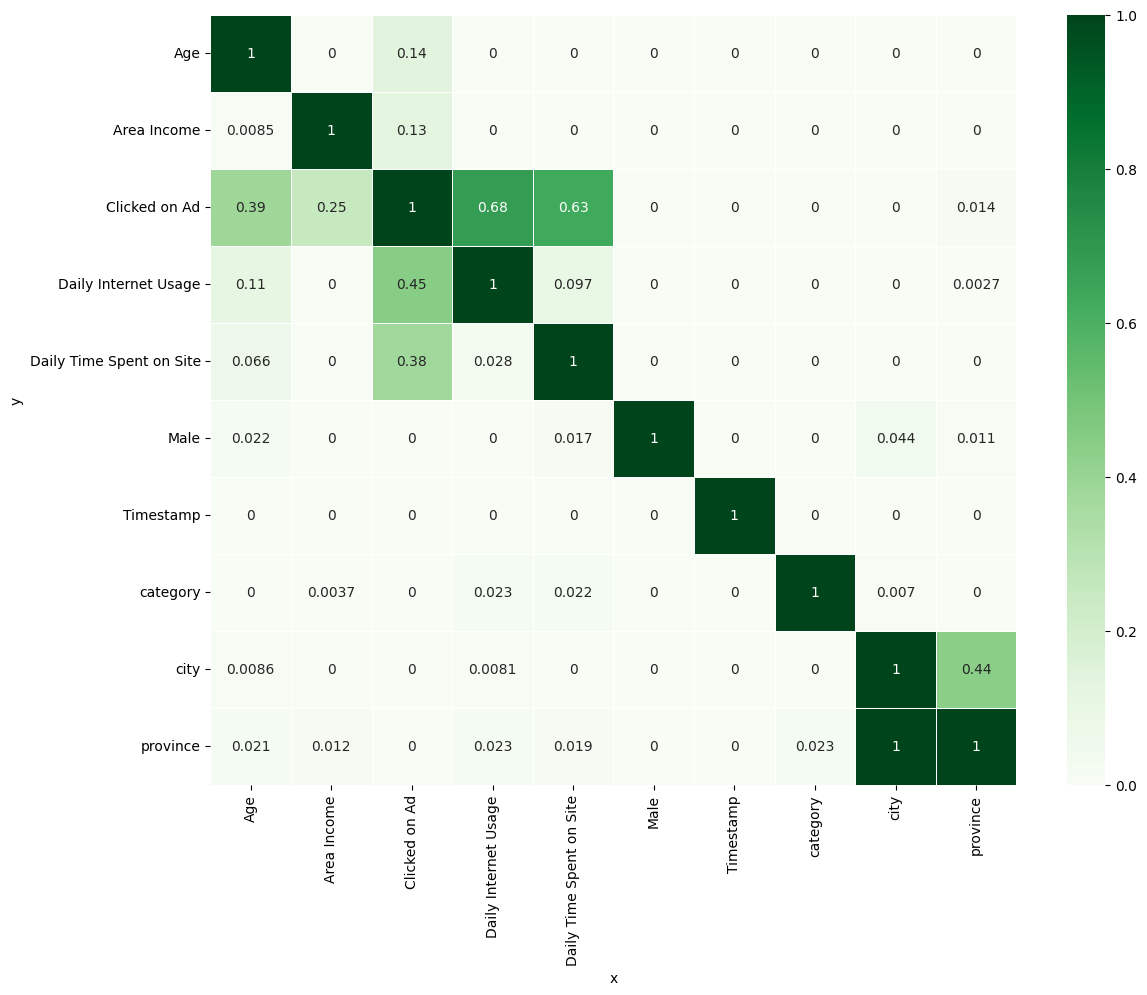

In [ ]:
df_pps = pps.matrix(df)
matrix_df = df_pps[["x", "y", "ppscore"]].pivot(columns="x", index="y", values="ppscore")
plt.figure(figsize=(13,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap='Greens', linewidth=0.5, annot=True)

Berdasarkan perhitungan dengan menggunakan PPS di atas, feature yang berpengaruh secara signifikan dengan target diantaranya:
- Age
- Area Income
- Daily Internet Usage
- Daily Time Spent on Site

# Data Preprocessing

Pada data preprocessing kita membutuhkan data yang bersih sehingga mampu diterapkan pada beberapa model machine learning.

Tahapan-tahapan yang perlu dilakukan adalah:
1. Handle Missing Value
2. Extract Datetime Data
3. Split Target dan features
4. Feature Encoding 

## Handle Missing Value

In [ ]:
#banyak data yang hilang
print((df.isna().sum()/df.shape[0]*100)['Daily Time Spent on Site'])
print((df.isna().sum()/df.shape[0]*100)['Area Income'])
print((df.isna().sum()/df.shape[0]*100)['Daily Internet Usage'])
print((df.isna().sum()/df.shape[0]*100)['Male'])

1.3
1.3
1.0999999999999999
0.3


Data yang hilang pada masing-masing kolom adalah kurang dari 5% data total. Maka, baris dengan data yang hilang akan dihapus.

In [ ]:
df.dropna(inplace=True, subset=['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male'])

In [ ]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Feature Extraction

In [ ]:
## UDF for Feature Extraction
def extract_day_of_week(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').weekday()

def extract_day_of_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').day

def extract_month(time):
    return dt.strptime(time,'%m/%d/%Y %H:%M').month


In [ ]:
df['day_of_week'] = df['Timestamp'].apply(extract_day_of_week)
df['day_of_month'] = df['Timestamp'].apply(extract_day_of_month)
df['month'] = df['Timestamp'].apply(extract_month)

df = df.drop(labels=['Timestamp'],axis=1)

In [ ]:
counts = df.groupby(['day_of_week','Clicked on Ad'],as_index=False).size()

## Split Data

In [ ]:
X = df.drop(labels=['Clicked on Ad'],axis=1)
y = np.where(df['Clicked on Ad']=='No',0,1)

## Feature Encoding

In [ ]:
# membuat One Hot Encoding (OHE) untuk feature kategorik
X_dummy = pd.get_dummies(X)

# Modelling

## Split Data Test dan Train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size = 0.3, stratify=y, random_state = 42)

print('Dimensi Train:', X_train.shape)
print('Dimensi Test:', X_test.shape)

Dimensi Train: (674, 65)
Dimensi Test: (289, 65)


In [ ]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

## Experiment 1

In [ ]:
result = experiment(X_train, X_test, y_train, y_test)
result = pd.DataFrame(result)
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.681661,0.657534,0.695652,0.028047
1,Logistic Regression,LogisticRegression(),0.494810,0.000000,0.000000,0.067874
2,Decision Tree,DecisionTreeClassifier(),0.951557,0.972603,0.934211,0.022223
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.972318,0.986301,0.960000,0.531013
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.989619,0.986301,0.993103,0.419568


Hasil modeling dengan menggunakan data default (preprocessing sederhana), yaitu: 
- Model Gradient Boosting memiliki akurasi terbesar tetapi hampir overfitting. 
- Adapun model lain yang akurasinya cukup tinggi adalah random forest.
- Pada model k-nearest neighbor dan logistic regression akurasi yang dihasilkan tidak begitu bagus.

## Experiment 2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

In [ ]:
result2 = experiment(X_train_minmax,X_test_minmax,y_train,y_test)
result2 = pd.DataFrame(result2)

In [ ]:
result2

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.820069,0.773973,0.856061,0.003598
1,Logistic Regression,LogisticRegression(),0.975779,0.972603,0.979310,0.013060
2,Decision Tree,DecisionTreeClassifier(),0.958478,0.965753,0.952703,0.007892
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.972318,0.986301,0.960000,0.249304
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.989619,0.986301,0.993103,0.241990


Setelah menerapkan min max scaler diperoleh:
- Model k-nearest neighbor dan logistic regression meningkat secara signifikan
- Model Gradient Boosting tetap menjadi model yang akurasinya paling tinggi dan cenderung overfitting.

Berdasarkan hal tersebut kita akan pilih Random Forest sebagai model terbaik karena memiliki akurasi bestfit dibandingkan Gradient Boosting. 

Logistic Regression juga bisa menjadi pilihan yang baik jika ada kendala tentang komputasi.

## Evaluation

In [ ]:
final_model = result2['model'][3]
y_pred = final_model.predict(X_test_minmax)

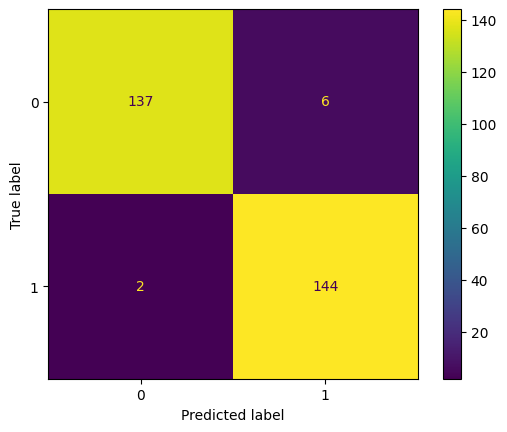

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)

disp.plot()
plt.show()

Berdasarkan model Random Forest kita akan melihat bagaimana performa model kita secara mendetail.

Dengan menggunakan confusion matrix, diperoleh yang dihasilkan model Random Forest sangatlah baik. Kita dapat melihat kesalahan prediksi (cell ungu) berjumlah sangat sedikit (bagian kanan atas dan kiri bawah).

Dengan hasil tersebut maka kita akan mendapatkan akurasi, precision, dan recall yang bagus.

## Feature Importances

In [ ]:
feature_imp = {}

feature_imp['columns'] = X_train.columns
feature_imp['feature_imp'] = result2['model'][3].feature_importances_

In [ ]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'], ascending=False).head(20)

<Axes: xlabel='feature_imp', ylabel='columns'>

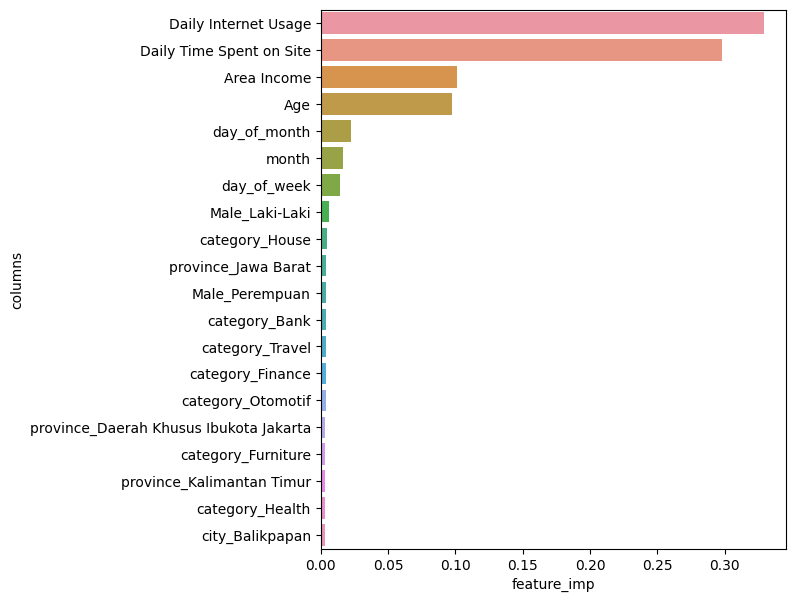

In [ ]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'], y=df_feature_imp['columns'])

Dengan menggunakan model Random Forest didapat feature yang paling penting dalam membangun model, yaitu:
- Daily internet usage merupakan feature yang sangat penting dalam menentukan apakah user akan click atau tidak. 
- Adapun feature penting lain adalah daily time spent on site, umur, dan area income .

Jika kita combine insight yang kita dapatkan dari proses EDA dapat diketahui bahwa ternyata penggunaan internet harian yang semakin tinggi maka peluang user akan click semakin kecil.



# Business Recommendation

## Feature Based

Berdasarkan EDA dan feature importance, dapat disimpulkan bahwa:
1. Data yang didapatkan memiliki 2 segment user, yaitu segment active user dan non-active user.
   - Active user memiliki kriteria sering menggunakan internet, sering mengunjungi website suatu product, memiliki umur yang relatif muda dan pendapatan yang tinggi.
   - Non-active user memiliki sifat sebaliknya.
2. Non-active user, cenderung lebih mudah tertarik untuk click product pada digital ads.
3. User yang cukup sering dalam menggunakan internet justru lebih sulit untuk diberikan iklan karena mereka mungkin sudah terbiasa terhadap digital ads. 
4. Kalangan orang tua menjadi market yang potensial untuk market digital.

Recommendation:
1. Kita bisa menggunakan cara yang lebih unik (soft selling) agar tidak begitu kelihatan beriklan oleh users.
2. Gunakan konten yang sederhana agar bisa menggaet user dengan segment non-active user.


## Model Based - Simulation

Dengan menggunakan model ML yang telah dibuat kita dapat membuat simulasi sebagai berikut:

Dengan asumsi:

* Budget untuk beriklan terhadap seorang user sebesar **10rb rupiah**
* Menggunakan data test sebagai alat simulasi sekitar 289 user dengan jumlah user conver sebanyak 146 dan user tidak covert sebanyak 143 user.
* Setiap user yang convert kita akan mendapatkan keuntungan sebesar **12rb rupiah**


In [ ]:
# Ukuran data test
X_test.shape

(289, 65)

In [ ]:
# Jumlah kelas pada setiap data
jum_class = pd.Series(y_test).value_counts()
jum_class

1    146
0    143
dtype: int64

Simulasi:

1. Tanpa Machine Learning Model
    * Kita akan menggunakan budget sekitar 289 * 10rb = 2.89jt rupiah untuk melakukan advertisement
    * **Cost=2.89jt**
    * Sedangkan conversion rate yang akan kita dapatkan sebanyak 50%
    * Karena hanya ada 146 yang convert maka kita akan mendapatkan 146 * 12rb = 1.752jt
    * **Revenue=1.752jt**
    * **Profit=1.752-2.89=-1.138jt**
    * Berdasarkan simulasi di atas jika kita tidak menggunakan machine learning model dan maka kita akan mendapatkan **potential loss sebesar 1.138jt rupiah**

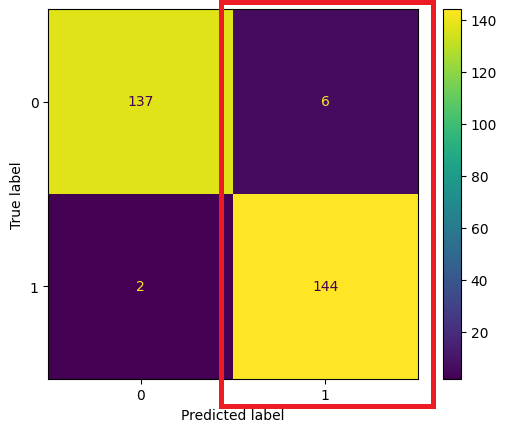

In [ ]:
from IPython import display
display.Image("confusion matrix - 3.png")

2. Dengan Menggunakan ML Model
    * Kita akan melakukan advertisement hanya pada user yang berpotensi clicked (yang kita prediksi 1)
    * Kita akan menggunakan budget sekitar 150 * 10rb = 1.5jt rupiah untuk melakukan advertisement
    * **Cost=1.5jt**
    * Sedangkan conversion rate yang akan kita dapatkan sebanyak 144/150 = 96%
    * Dari 150 yang kita prediksi akan ada 144 user yang convert
    * Maka kita akan mendapatkan 144 * 12rb = 1.728jt
    * **Revenue=1.728jt**
    * **Profit=1.728-1.5=228rb**
    * Berdasarkan simulasi di atas jika kita menggunakan machine learning model dan maka kita akan mendapatkan **potential revenue sebesar 228rb rupiah**

3. **Kesimpulannya**, ML dapat bekerja dengan baik bahkan bisa mengantisipasi potential loss menjadi potential revenue